In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/features_having_most_influence_on_UNSW.csv")


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,DoS,UDP
733701,2787099,udp,192.168.100.147,932,192.168.100.3,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,DDoS,UDP
733702,2255382,tcp,192.168.100.149,47980,192.168.100.3,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,DDoS,TCP
733703,588946,tcp,192.168.100.147,25096,192.168.100.7,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,DoS,TCP


In [ ]:
df.info()

In [ ]:
pd.value_counts(df.category)

In [ ]:
df.nunique()

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')


In [ ]:
df.isna().sum()


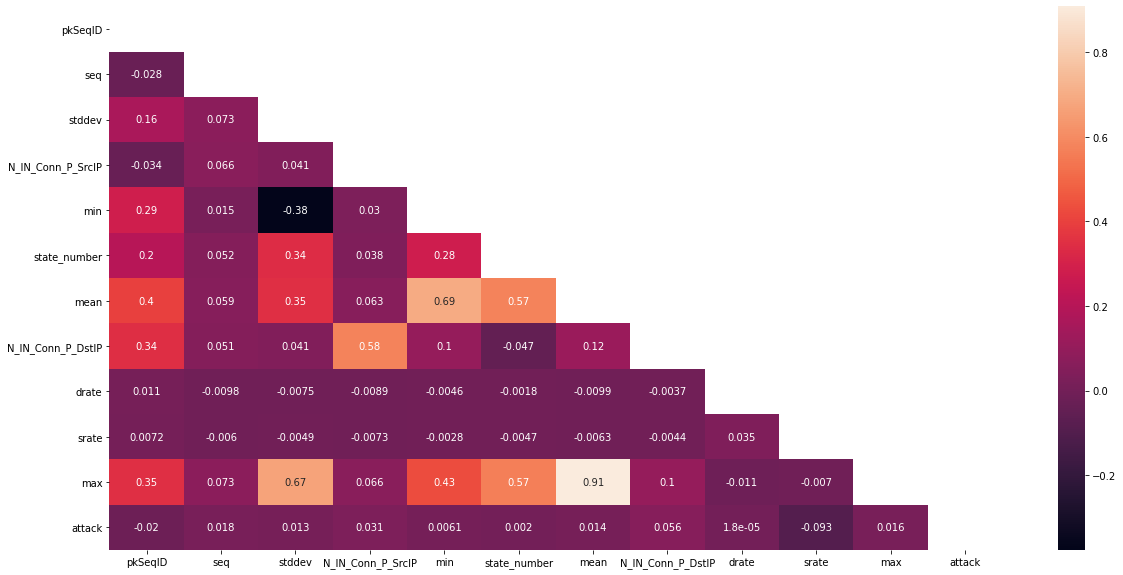

In [ ]:
#CODRRELATION
corr = df.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

From the above correlation heatmap and the correlation coolwarm map below we see that mean and max columns are highly correlated, hence we can remove one of them

In [ ]:
df.corr().style.background_gradient(cmap="coolwarm")

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
pkSeqID,1.000000,-0.027968,0.163074,-0.034002,0.285580,0.203275,0.398975,0.344957,0.011276,0.007222,0.350195,-0.019877
seq,-0.027968,1.000000,0.073480,0.065563,0.015416,0.052405,0.058639,0.050539,-0.009782,-0.006045,0.072952,0.017947
stddev,0.163074,0.073480,1.000000,0.040908,-0.376608,0.339678,0.350176,0.040694,-0.007464,-0.004896,0.667964,0.012640
N_IN_Conn_P_SrcIP,-0.034002,0.065563,0.040908,1.000000,0.030092,0.037561,0.062560,0.576600,-0.008948,-0.007255,0.065883,0.030598
min,0.285580,0.015416,-0.376608,0.030092,1.000000,0.276375,0.693706,0.103622,-0.004557,-0.002796,0.426768,0.006102
state_number,0.203275,0.052405,0.339678,0.037561,0.276375,1.000000,0.572631,-0.047446,-0.001837,-0.004750,0.566267,0.002041
mean,0.398975,0.058639,0.350176,0.062560,0.693706,0.572631,1.000000,0.120018,-0.009868,-0.006285,0.908540,0.013647
N_IN_Conn_P_DstIP,0.344957,0.050539,0.040694,0.576600,0.103622,-0.047446,0.120018,1.000000,-0.003651,-0.004362,0.101255,0.055616
drate,0.011276,-0.009782,-0.007464,-0.008948,-0.004557,-0.001837,-0.009868,-0.003651,1.000000,0.035355,-0.010914,0.000018
srate,0.007222,-0.006045,-0.004896,-0.007255,-0.002796,-0.004750,-0.006285,-0.004362,0.035355,1.000000,-0.007026,-0.093351


In [ ]:
## Spliting the dataset into categorical and numerical features
def getFeatures(df):
    num_features = df.select_dtypes(include=[np.number])
    cat_features = df.select_dtypes(include=[np.object])
    return num_features,cat_features

In [ ]:
num_features,cat_features = getFeatures(df)


In [ ]:
num_features

In [ ]:
cat_features


In [ ]:
df.columns


In [ ]:
skew_features = num_features.apply(lambda x :x.skew()).sort_values(ascending=True)
skew_features

In [ ]:
## Copying the  dataframe into new dataframe and we will be performing changes on the new dataframe
df_cpy = df.copy()

In [ ]:
def comparing_train_and_test_feature(df,df_test,col):
    fig = plt.figure(figsize=(16,10))
    ax0 = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)
    df[col].plot(kind='kde',ax=ax0)
    df_test[col].plot(kind='kde',ax=ax1)
    ax0.set_xlabel(col)
    ax1.set_xlabel(col)
    ax0.set_title("Density plot of " + str(col) + " of training set")
    ax1.set_title("Density plot of " + str(col) + " of testing set")
    plt.show()

In [ ]:
## Density plot
for i in range(len(num_features.columns)):
    comparing_train_and_test_feature(train_num_features,num_features,num_features.columns[i])


From the above density plots we can see that the distrbution of each feature is almost same in train and test dataset, so we are not changing anything

In [ ]:
for i in range(len(num_features.columns)):
    print(num_features.columns[i])
    

In [ ]:
sns.boxplot(y="seq",data=num_features)

    

In [ ]:
sns.boxplot(y="stddev",data=num_features)

    

In [ ]:
sns.boxplot(y="N_IN_Conn_P_SrcIP",data=num_features)

    

In [ ]:
sns.boxplot(y="min",data=num_features)


In [ ]:
sns.boxplot(y="state_number",data=num_features)


In [ ]:
sns.boxplot(y="mean",data=num_features)


In [ ]:
sns.boxplot(y="N_IN_Conn_P_DstIP",data=num_features)


In [ ]:
sns.boxplot(y="drate",data=num_features)


In [ ]:
sns.boxplot(y="srate",data=num_features)


In [ ]:
sns.boxplot(y="max",data=num_features)


In [ ]:
sns.boxplot(y="attack",data=num_features)


In [ ]:
sns.scatterplot(x='pkSeqID',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='seq',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='stddev',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='N_IN_Conn_P_SrcIP',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='min',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='state_number',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='mean',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='N_IN_Conn_P_DstIP',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='drate',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='srate',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='max',y='category',hue='attack',data=df)

In [ ]:
sns.scatterplot(x='attack',y='category',hue='attack',data=df)

In [ ]:
df_cpy.isna().sum()

This shows that our dataset has no Null values at all. Hence we need not handle it

In [ ]:
df_cpy.head()

In [ ]:
cat_features=cat_features.drop(['category','subcategory'],axis=1)

In [ ]:
cat_features

,proto,saddr,sport,daddr,dport
0,udp,192.168.100.150,48516,192.168.100.3,80
1,tcp,192.168.100.148,22267,192.168.100.3,80
2,udp,192.168.100.149,28629,192.168.100.3,80
3,tcp,192.168.100.148,42142,192.168.100.3,80
4,tcp,192.168.100.149,1645,192.168.100.5,80
...,...,...,...,...,...
733700,udp,192.168.100.148,17412,192.168.100.6,80
733701,udp,192.168.100.147,932,192.168.100.3,80
733702,tcp,192.168.100.149,47980,192.168.100.3,80
733703,tcp,192.168.100.147,25096,192.168.100.7,80


In [ ]:
for col in cat_features.columns:
    print(col," : ",len(cat_features[col].unique())," unique labels")

proto  :  5  unique labels
saddr  :  16  unique labels
sport  :  65538  unique labels
daddr  :  45  unique labels
dport  :  4111  unique labels


In [ ]:
#TARGET ENCODING (Mean encoding with multiclass target variable)
# We do mean encoding wrt each class of the target variable after one - hot encoding the target variable
#REFER TO https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53
def target_encode_multiclass(X,y): #X,y are pandas df and series
    y=y.astype(str)   #convert to string to onehot encode
    enc=ce.OneHotEncoder().fit(y)
    y_onehot=enc.transform(y)
    print(y_onehot)
    class_names=y_onehot.columns  #names of onehot encoded columns
    X_obj=X.select_dtypes('object') #separate categorical columns
    X=X.select_dtypes(exclude='object') #X is empty because we dont have numerical features and we ar
    for class_ in class_names:
      
        enc=ce.TargetEncoder()
        enc.fit(X_obj,y_onehot[class_]) #convert all categorical 
        temp=enc.transform(X_obj)       #columns for class_
        temp.columns=[str(x)+'_'+str(class_) for x in temp.columns]
        X=pd.concat([X,temp],axis=1)    #add to original dataset
      
    return X

In [ ]:
pip install category-encoders

In [ ]:
#DOING THE ABOVE CATEGORY ENCODING FOR TEST DATASET
import category_encoders as ce

test_encoded_cat_features=target_encode_multiclass(cat_features,df["category"])
test_encoded_cat_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


        category_1  category_2  category_3  category_4  category_5
0                1           0           0           0           0
1                0           1           0           0           0
2                0           1           0           0           0
3                0           1           0           0           0
4                1           0           0           0           0
...            ...         ...         ...         ...         ...
733700           1           0           0           0           0
733701           0           1           0           0           0
733702           0           1           0           0           0
733703           1           0           0           0           0
733704           0           1           0           0           0

[733705 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: Future

,proto_category_1,saddr_category_1,sport_category_1,daddr_category_1,dport_category_1,proto_category_2,saddr_category_2,sport_category_2,daddr_category_2,dport_category_2,proto_category_3,saddr_category_3,sport_category_3,daddr_category_3,dport_category_3,proto_category_4,saddr_category_4,sport_category_4,daddr_category_4,dport_category_4,proto_category_5,saddr_category_5,sport_category_5,daddr_category_5,dport_category_5
0,0.517034,0.462725,0.352941,0.173510,0.461713,0.475314,0.512719,0.647059,0.809391,0.538059,0.007437,0.024460,2.785828e-09,0.017080,0.000217,0.000215,0.000067,1.641159e-11,0.000008,0.000011,0.000000,0.000028,2.147310e-12,0.000011,0.0
1,0.371697,0.442030,0.624840,0.173510,0.461713,0.588028,0.535132,0.375137,0.809391,0.538059,0.040206,0.022773,2.255324e-05,0.017080,0.000217,0.000030,0.000065,1.328633e-07,0.000008,0.000011,0.000039,0.000000,1.738399e-08,0.000011,0.0
2,0.517034,0.471855,0.499994,0.173510,0.461713,0.475314,0.507779,0.500003,0.809391,0.538059,0.007437,0.020299,3.054655e-06,0.017080,0.000217,0.000215,0.000067,1.799527e-08,0.000008,0.000011,0.000000,0.000000,2.354521e-09,0.000011,0.0
3,0.371697,0.442030,0.352941,0.173510,0.461713,0.588028,0.535132,0.588235,0.809391,0.538059,0.040206,0.022773,5.882353e-02,0.017080,0.000217,0.000030,0.000065,1.641159e-11,0.000008,0.000011,0.000039,0.000000,2.147310e-12,0.000011,0.0
4,0.371697,0.471855,0.333335,0.930698,0.461713,0.588028,0.507779,0.666664,0.000000,0.538059,0.040206,0.020299,4.134467e-07,0.069225,0.000217,0.000030,0.000067,2.435655e-09,0.000077,0.000011,0.000039,0.000000,3.186838e-10,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,0.517034,0.442030,0.437500,0.988210,0.461713,0.475314,0.535132,0.562500,0.000000,0.538059,0.007437,0.022773,7.572665e-09,0.011790,0.000217,0.000215,0.000065,4.461131e-11,0.000000,0.000011,0.000000,0.000000,5.836993e-12,0.000000,0.0
733701,0.517034,0.431057,0.333335,0.173510,0.461713,0.475314,0.547414,0.666664,0.809391,0.538059,0.007437,0.021471,4.134467e-07,0.017080,0.000217,0.000215,0.000058,2.435655e-09,0.000008,0.000011,0.000000,0.000000,3.186838e-10,0.000011,0.0
733702,0.371697,0.471855,0.411765,0.173510,0.461713,0.588028,0.507779,0.529412,0.809391,0.538059,0.040206,0.020299,5.882353e-02,0.017080,0.000217,0.000030,0.000067,1.641159e-11,0.000008,0.000011,0.000039,0.000000,2.147310e-12,0.000011,0.0
733703,0.371697,0.431057,0.500000,0.989069,0.461713,0.588028,0.547414,0.500000,0.000000,0.538059,0.040206,0.021471,5.595474e-08,0.010919,0.000217,0.000030,0.000058,3.296348e-10,0.000012,0.000011,0.000039,0.000000,4.312979e-11,0.000000,0.0


Now we hav Target_Encoded the categorical features of both test and train datasets, we didnt take the following encoding aproaches : 
1. one hot coding - Dimentionality problem arises
2. label encoding - data is not ordinal
3. mean encoding - Dependent variable is not binary and same mean appears for more than 1 unique value, it is a multiclass classification problem
Refer to article for further understanding : https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53

In [ ]:
num_features=num_features.drop(['pkSeqID','attack'],axis=1)

In [ ]:
#SCALING THE NUMERICAL DATASET
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [ ]:
# MinMax Scaling ['seq','N_IN_Conn_P_SrcIP', 'N_IN_Conn_P_DstIP'] for train dataset 
df_train_num_scaled = train_num_features.copy()
col_names = ['seq','stddev','N_IN_Conn_P_SrcIP','min','state_number','mean','N_IN_Conn_P_DstIP','max']
features = df_train_num_scaled[col_names]

df_train_num_scaled[col_names] = scaler.fit_transform(features.values)
df_train_num_scaled

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,0.960997,0.761131,1.000000,0.000000,0.3,0.539459,1.000000,0.000000,0.494549,0.806324
1,0.979074,0.031242,0.373737,0.774411,0.2,0.789847,1.000000,0.000000,0.256493,0.802585
2,0.239960,0.107606,1.000000,0.597152,0.2,0.670716,1.000000,0.000000,0.294880,0.721841
3,0.378197,0.730219,0.626263,0.000000,0.3,0.646911,0.626263,0.000000,0.461435,0.988461
4,0.400679,0.329394,1.000000,0.598336,0.3,0.799542,1.000000,0.000000,1.002999,0.998891
...,...,...,...,...,...,...,...,...,...,...
2934812,0.966283,0.006806,1.000000,0.819703,0.3,0.823487,1.000000,0.000000,0.243473,0.824810
2934813,0.883612,0.769924,1.000000,0.000000,0.3,0.545683,1.000000,0.000000,0.490800,0.818107
2934814,0.604916,0.845987,1.000000,0.000000,0.3,0.423688,1.000000,0.000000,0.207444,0.866523
2934815,0.685916,0.000000,1.000000,0.000000,0.2,0.000000,1.000000,0.000000,0.162130,0.000000


In [ ]:
# MinMax Scaling ['seq','N_IN_Conn_P_SrcIP', 'N_IN_Conn_P_DstIP'] for test dataset 
df_test_num_scaled = num_features.copy()
col_names = ['seq','stddev','N_IN_Conn_P_SrcIP','min','state_number','mean','N_IN_Conn_P_DstIP','max']
features = df_test_num_scaled[col_names]

df_test_num_scaled[col_names] = scaler.fit_transform(features.values)
df_test_num_scaled

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,0.667756,0.090831,1.000000,0.823303,0.3,0.894736,1.000000,0.000000,0.404711,0.943888
1,0.545450,0.181034,1.000000,0.690549,0.0,0.764018,1.000000,0.225077,0.401397,0.888586
2,0.637014,0.773624,0.727273,0.000000,0.3,0.548238,1.000000,0.000000,0.407287,0.827691
3,0.780341,0.171742,0.555556,0.656848,0.0,0.727937,1.000000,0.000000,0.343654,0.845940
4,0.152766,0.824422,1.000000,0.000000,0.2,0.238550,1.000000,0.000000,0.135842,0.950726
...,...,...,...,...,...,...,...,...,...,...
733700,0.641319,0.698482,0.383838,0.000000,0.3,0.606299,0.383838,0.000000,0.224603,0.808687
733701,0.604403,0.278208,0.646465,0.602809,0.3,0.783938,1.000000,0.000000,0.875121,0.938327
733702,0.304488,0.698767,0.525253,0.000000,0.0,0.494660,1.000000,0.278496,0.472773,0.760429
733703,0.240890,0.000000,1.000000,0.000000,0.2,0.000000,1.000000,0.000000,0.070461,0.000000


In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_train['category']= label_encoder.fit_transform(df_train['category'])
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)


NameError: ignored

We have applied Feature scaling and transformation and now all the feature values range between 0 and 1.

In [ ]:
df_train_final=pd.concat([df_train_num_scaled,train_encoded_cat_features,df_train['category']],axis=1)
df_train_final

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,...,saddr_category_4,sport_category_4,daddr_category_4,dport_category_4,proto_category_5,saddr_category_5,sport_category_5,daddr_category_5,dport_category_5,category
0,0.960997,0.761131,1.000000,0.000000,0.3,0.539459,1.000000,0.000000,0.494549,0.806324,...,0.000067,0.0,0.000011,0.000005,0.000000,0.000031,0.0,0.000012,0.0,0
1,0.979074,0.031242,0.373737,0.774411,0.2,0.789847,1.000000,0.000000,0.256493,0.802585,...,0.000067,0.0,0.000011,0.000005,0.000047,0.000031,0.0,0.000012,0.0,0
2,0.239960,0.107606,1.000000,0.597152,0.2,0.670716,1.000000,0.000000,0.294880,0.721841,...,0.000049,0.0,0.000011,0.000005,0.000047,0.000000,0.0,0.000012,0.0,0
3,0.378197,0.730219,0.626263,0.000000,0.3,0.646911,0.626263,0.000000,0.461435,0.988461,...,0.000067,0.0,0.000011,0.000005,0.000000,0.000031,0.0,0.000012,0.0,1
4,0.400679,0.329394,1.000000,0.598336,0.3,0.799542,1.000000,0.000000,1.002999,0.998891,...,0.000049,0.0,0.000011,0.000005,0.000000,0.000000,0.0,0.000012,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,0.966283,0.006806,1.000000,0.819703,0.3,0.823487,1.000000,0.000000,0.243473,0.824810,...,0.000051,0.0,0.000025,0.000005,0.000000,0.000001,0.0,0.000000,0.0,1
2934813,0.883612,0.769924,1.000000,0.000000,0.3,0.545683,1.000000,0.000000,0.490800,0.818107,...,0.000067,0.0,0.000011,0.000005,0.000000,0.000031,0.0,0.000012,0.0,0
2934814,0.604916,0.845987,1.000000,0.000000,0.3,0.423688,1.000000,0.000000,0.207444,0.866523,...,0.000051,0.0,0.000025,0.000005,0.000000,0.000001,0.0,0.000000,0.0,1
2934815,0.685916,0.000000,1.000000,0.000000,0.2,0.000000,1.000000,0.000000,0.162130,0.000000,...,0.000049,0.0,0.000009,0.000005,0.000047,0.000000,0.0,0.000000,0.0,1


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['category']= label_encoder.fit_transform(df['category'])
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'DDoS': 0, 'DoS': 1, 'Normal': 2, 'Reconnaissance': 3, 'Theft': 4}


In [ ]:
df_test_final=pd.concat([num_features,test_encoded_cat_features,df['category']],axis=1)
df_test_final

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,proto_category_1,saddr_category_1,sport_category_1,daddr_category_1,dport_category_1,proto_category_2,saddr_category_2,sport_category_2,daddr_category_2,dport_category_2,proto_category_3,saddr_category_3,sport_category_3,daddr_category_3,dport_category_3,proto_category_4,saddr_category_4,sport_category_4,daddr_category_4,dport_category_4,proto_category_5,saddr_category_5,sport_category_5,daddr_category_5,dport_category_5,category
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,0.517034,0.462725,0.352941,0.173510,0.461713,0.475314,0.512719,0.647059,0.809391,0.538059,0.007437,0.024460,2.785828e-09,0.017080,0.000217,0.000215,0.000067,1.641159e-11,0.000008,0.000011,0.000000,0.000028,2.147310e-12,0.000011,0.0,1
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,0.371697,0.442030,0.624840,0.173510,0.461713,0.588028,0.535132,0.375137,0.809391,0.538059,0.040206,0.022773,2.255324e-05,0.017080,0.000217,0.000030,0.000065,1.328633e-07,0.000008,0.000011,0.000039,0.000000,1.738399e-08,0.000011,0.0,0
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,0.517034,0.471855,0.499994,0.173510,0.461713,0.475314,0.507779,0.500003,0.809391,0.538059,0.007437,0.020299,3.054655e-06,0.017080,0.000217,0.000215,0.000067,1.799527e-08,0.000008,0.000011,0.000000,0.000000,2.354521e-09,0.000011,0.0,0
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,0.371697,0.442030,0.352941,0.173510,0.461713,0.588028,0.535132,0.588235,0.809391,0.538059,0.040206,0.022773,5.882353e-02,0.017080,0.000217,0.000030,0.000065,1.641159e-11,0.000008,0.000011,0.000039,0.000000,2.147310e-12,0.000011,0.0,0
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,0.371697,0.471855,0.333335,0.930698,0.461713,0.588028,0.507779,0.666664,0.000000,0.538059,0.040206,0.020299,4.134467e-07,0.069225,0.000217,0.000030,0.000067,2.435655e-09,0.000077,0.000011,0.000039,0.000000,3.186838e-10,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,0.517034,0.442030,0.437500,0.988210,0.461713,0.475314,0.535132,0.562500,0.000000,0.538059,0.007437,0.022773,7.572665e-09,0.011790,0.000217,0.000215,0.000065,4.461131e-11,0.000000,0.000011,0.000000,0.000000,5.836993e-12,0.000000,0.0,1
733701,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,0.517034,0.431057,0.333335,0.173510,0.461713,0.475314,0.547414,0.666664,0.809391,0.538059,0.007437,0.021471,4.134467e-07,0.017080,0.000217,0.000215,0.000058,2.435655e-09,0.000008,0.000011,0.000000,0.000000,3.186838e-10,0.000011,0.0,0
733702,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,0.371697,0.471855,0.411765,0.173510,0.461713,0.588028,0.507779,0.529412,0.809391,0.538059,0.040206,0.020299,5.882353e-02,0.017080,0.000217,0.000030,0.000067,1.641159e-11,0.000008,0.000011,0.000039,0.000000,2.147310e-12,0.000011,0.0,0
733703,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,0.371697,0.431057,0.500000,0.989069,0.461713,0.588028,0.547414,0.500000,0.000000,0.538059,0.040206,0.021471,5.595474e-08,0.010919,0.000217,0.000030,0.000058,3.296348e-10,0.000012,0.000011,0.000039,0.000000,4.312979e-11,0.000000,0.0,1


# MODEL BUILDING

In [ ]:
X = df_test_final.drop('category', axis=1)
y = df_test_final['category']

In [ ]:
import sklearn
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler 

import pickle


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
pip install dask distributed --upgrade


Requirement already up-to-date: dask in /usr/local/lib/python3.7/dist-packages (2021.6.0)
Requirement already up-to-date: distributed in /usr/local/lib/python3.7/dist-packages (2021.6.0)


In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import autosklearn.classification as classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)


In [ ]:
auto=classifier.AutoSklearnClassifier(30)
auto.fit(X_train,y_train)

AutoSklearnClassifier(per_run_time_limit=3, time_left_for_this_task=30)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=auto.predict(X_test)


In [ ]:
score=accuracy_score(y_test,y_pred)
print(score)

0.5255869739041942


In [ ]:
auto.show_models()

"[(1.000000, MyDummyClassifier(config=1, init_params={'instance': None}, random_state=1)),\n]"

#  MULTINOMIAL LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train = df_train_final.iloc[:,:-1]
y_train = df_train_final['category']
X_test =  df_test_final.iloc[:,:-1]
y_test =  df_test_final['category']


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

In [ ]:
logreg = LogisticRegression(multi_class='ovr',solver='liblinear')
logreg.fit(X_train, y_train)

In [ ]:
#FOR TEST DATASET
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#accuracy_score(y_true,y_pred,normalize=False)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred)
print(confusion_matrix_test)

In [ ]:
y_pred1 = logreg.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred1)
#accuracy_score(y_true,y_pred,normalize=False)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred1)
print(confusion_matrix_train)